# Problem Set #2
MACS 30150, Dr. Evans  
Minghao Yang

## Problem 1: Numerical differentiation excercises (5 points)
### Ex 1 

In [1]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np

x = sy.symbols('x')
f_x = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
df_x = sy.diff(f_x, x)
df_x

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

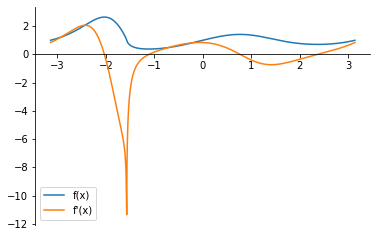

In [2]:
fx = sy.lambdify(x, f_x)
dfx = sy.lambdify(x, df_x)
x_points = np.linspace(-np.pi, np.pi, 1000)

plt.plot(x_points, fx(x_points), label='f(x)')
plt.plot(x_points, dfx(x_points), label="f'(x)")
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

### Ex 2
1. Forward approximation, order 1

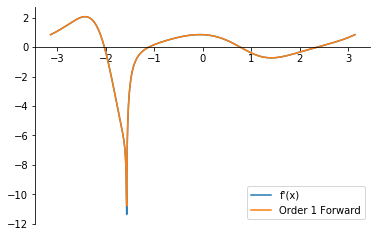

In [3]:
def for_1(fx, x0, h):
    quot = (fx(x0 + h) - fx(x0)) / h 
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, for_1(fx, x_points, 0.001), label='Order 1 Forward')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

2. Forward approximation, order 2

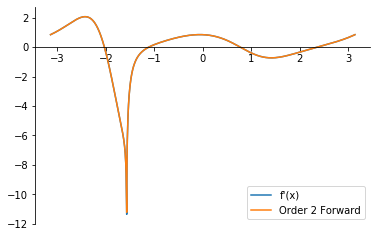

In [4]:
def for_2(fx, x0, h):
    quot = (-3 * fx(x0) + 4 * fx(x0 + h) - fx(x0 + 2 * h)) / (2 * h)
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, for_2(fx, x_points, 0.001), label='Order 2 Forward')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

3. Backward approximation, order 1

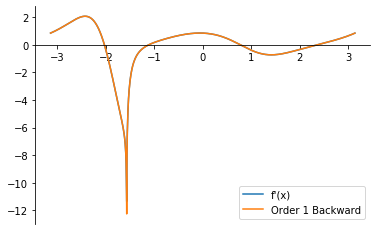

In [5]:
def back_1(fx, x0, h):
    quot = (fx(x0) - fx(x0 - h)) / h 
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, back_1(fx, x_points, 0.001), label='Order 1 Backward')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

4. Backward approximation, order 2

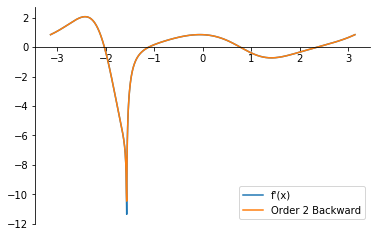

In [6]:
def back_2(fx, x0, h):
    quot = (3 * fx(x0) - 4 * fx(x0 - h) + fx(x0 - 2 * h)) / (2 * h)
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, back_2(fx, x_points, 0.001), label='Order 2 Backward')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

5. Centered approximation, order 2

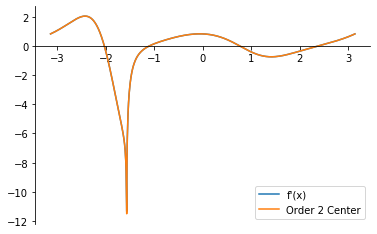

In [7]:
def cen_2(fx, x0, h):
    quot = (fx(x0 + h) - fx(x0 - h)) / (2 * h)
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, cen_2(fx, x_points, 0.001), label='Order 2 Center')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

6. Centered approximation, order 4

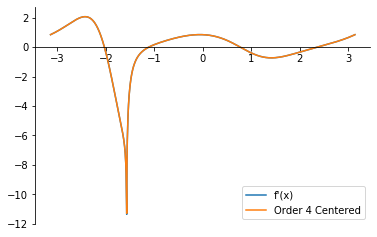

In [8]:
def cen_4(fx, x0, h):
    quot = (fx(x0 - 2 * h) - 8 * fx(x0 - h) + 8 * fx(x0 + h) - fx(x0 + 2 * h)) / (12 * h)
    return quot

plt.plot(x_points, dfx(x_points), label="f'(x)")
plt.plot(x_points, cen_4(fx, x_points, 0.001), label='Order 4 Centered')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

### Ex 3

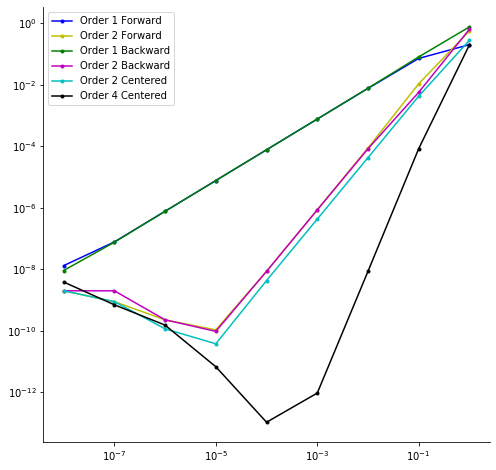

In [9]:
log_points = np.logspace(-8, 0, 9)

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.plot(log_points, abs(dfx(1) - for_1(fx, 1, log_points)), 'b.-', label='Order 1 Forward')
ax.plot(log_points, abs(dfx(1) - for_2(fx, 1, log_points)), 'y.-', label='Order 2 Forward')
ax.plot(log_points, abs(dfx(1) - back_1(fx, 1, log_points)), 'g.-', label='Order 1 Backward')
ax.plot(log_points, abs(dfx(1) - back_2(fx, 1, log_points)), 'm.-', label='Order 2 Backward')
ax.plot(log_points, abs(dfx(1) - cen_2(fx, 1, log_points)), 'c.-', label='Order 2 Centered')
ax.plot(log_points, abs(dfx(1) - cen_4(fx, 1, log_points)), 'k.-', label='Order 4 Centered')
ax.set_yticks([10 ** (-12), 10 ** (-10), 10 ** (-8), 10 ** (-6), 10 ** (-4), 10 ** (-2), 10 ** (0)])
ax.set_yscale('log')
ax.set_xticks([10 ** (-8), 10 ** (-7), 10 ** (-6), 10 ** (-5), 10 ** (-4), 10 ** (-3), 10 ** (2), 10 ** (-1), 10 ** (0)])
ax.set_xscale('log')
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', ncol=1)
plt.show()

### Ex 4

In [10]:
data_1p4 = np.load('plane.npy')

In [11]:
alpha_d = np.deg2rad(data_1p4[:, 1].copy())
beta_d = np.deg2rad(data_1p4[:, 2].copy())

In [12]:
alpha, beta = sy.symbols('alpha beta')
x_alphabeta = (500 * sy.tan(beta)) / (sy.tan(beta) - sy.tan(alpha))
xalphabeta = sy.lambdify([alpha, beta], x_alphabeta)
y_alphabeta = (500 * sy.tan(alpha) * sy.tan(beta)) / (sy.tan(beta) - sy.tan(alpha))
yalphabeta = sy.lambdify([alpha, beta], y_alphabeta)

In [13]:
x_prime = []
y_prime = []

# t = 7
x_prime.append(xalphabeta(alpha_d, beta_d)[1] - xalphabeta(alpha_d, beta_d)[0])
y_prime.append(yalphabeta(alpha_d, beta_d)[1] - yalphabeta(alpha_d, beta_d)[0])

# t = 8 - 13
for t in range(1, 7):
    x_prime.append(xalphabeta(alpha_d, beta_d)[t + 1] / 2 - xalphabeta(alpha_d, beta_d)[t - 1] / 2)
    y_prime.append(yalphabeta(alpha_d, beta_d)[t + 1] / 2 - yalphabeta(alpha_d, beta_d)[t - 1] / 2)
    
# t = 14
x_prime.append(xalphabeta(alpha_d, beta_d)[7] - xalphabeta(alpha_d, beta_d)[6])
y_prime.append(yalphabeta(alpha_d, beta_d)[7] - yalphabeta(alpha_d, beta_d)[6])
    

In [14]:
speed = []
for t in range(0, 8):
    temp = (x_prime[t] ** 2 + y_prime[t] ** 2) ** 0.5
    speed.append(temp)

In [15]:
print('t', end='    ')
for t in range(7, 10):
    print(t, end='        ')
for t in range(10, 15):
    print(t, end='       ')    
print('\n')
print("x'", end='   ')
for t in range(0, 8):
    print('{:.2f}'.format(x_prime[t]), end='    ')
print('\n')
print("y'", end='   ')
for t in range(0, 8):
    print('{:.2f}'.format(y_prime[t]), end='    ')
print('\n')
print('v', end = '    ')
for t in range(0, 8):
    print('{:.2f}'.format(speed[t]), end='    ')

t    7        8        9        10       11       12       13       14       

x'   44.67    45.32    47.28    48.36    46.65    49.70    51.90    49.55    

y'   12.66    12.44    12.86    13.08    12.48    13.74    14.64    14.07    

v    46.42    47.00    49.00    50.10    48.29    51.56    53.92    51.51    

### Ex 5

In [16]:
x, y = sy.symbols('x y')
f_xy = [x ** 2, x ** 3 - y]

In [17]:
def high_order_function(ff,x0,h):
    var_name = []
    for fi in ff:
        for va in fi.atoms(sy.Symbol):
            if va not in var:
                var.append(va)

In [18]:
def Jac_cal(f_xy, x0, h):
    var_name = []
    for each_f in f_xy:
        for each_v in each_f.atoms(sy.Symbol):
            if each_v not in var_name:
                var_name.append(each_v)
    
    x0_np = np.array(x0)
    fxy = sy.lambdify(var_name, f_xy)
    I = np.identity(len(x0))
    J = sy.zeros(len(f_xy), len(x0))
    for i in range(len(I)):
        up_bar = x0_np + h * I[:, i]
        low_bar = x0_np - h * I[:, i]
        J[:, i] = (np.array(fxy(*up_bar)) - np.array(fxy(*low_bar))) / (2 * h)
    return J 

In [19]:
Jac_cal(f_xy, [1, 2], 0.001)

Matrix([
[1.99999999999984,               0.0],
[3.00000099999986, -0.99999999999989]])

In [20]:
# Verifying the result

df1d_x = sy.diff(f_xy[0], x)
df1d_y = sy.diff(f_xy[0], y)
df2d_x = sy.diff(f_xy[1], x)
df2d_y = sy.diff(f_xy[1], y)

df1dx = sy.lambdify([x, y], df1d_x)
df1dy = sy.lambdify([x, y], df1d_y)
df2dx = sy.lambdify([x, y], df2d_x)
df2dy = sy.lambdify([x, y], df2d_y)

J_exact = np.zeros(4)
J_exact[0] = df1dx(1, 2)
J_exact[1] = df1dy(1, 2)
J_exact[2] = df2dx(1, 2)
J_exact[3] = df2dy(1, 2)

J_exact.reshape((2, 2))


array([[ 2.,  0.],
       [ 3., -1.]])

### Ex 7

In [21]:
import random
from autograd import numpy as anp
from autograd import grad
import time

In [22]:
def error_exp(N):
    t_sym = np.zeros(N)
    er_sym = np.zeros(N)
    t_quot = np.zeros(N)
    er_quot = np.zeros(N)
    t_grad = np.zeros(N)
    er_grad = np.zeros(N)
    f_x = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    fx = sy.lambdify(x, f_x)
    g_x = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    
    for i in range(N):
        
        # generate a random number
        x0 = random.uniform(-np.pi, np.pi)
        
        # sympy
        t_start_sym = time.perf_counter()
        df_x = sy.diff(f_x, x)
        dfx = sy.lambdify(x, df_x)
        exact = dfx(x0)
        t_end_sym = time.perf_counter()
        t_sym[i] = t_end_sym - t_start_sym
        er_sym[i] = 1e-18
        
        # difference quotients
        t_start_quot = time.perf_counter()
        quot_est = cen_4(fx, x0, 0.001)
        t_end_quot = time.perf_counter()
        gap_quot = abs(quot_est - exact)
        t_quot[i] = t_end_quot - t_start_quot
        er_quot[i] = gap_quot
        
        # autograd
        t_start_grad = time.perf_counter()
        dgx = grad(g_x)
        grad_est = dgx(x0)
        t_end_grad = time.perf_counter()
        gap_grad = abs(grad_est - exact)
        t_grad[i] = t_end_grad - t_start_grad
        er_grad[i] = gap_grad
    
    # plot the figure
    ax = plt.gca()
    ax.loglog(t_sym, er_sym, ".", markersize=15, alpha=0.3, label="SymPy")
    ax.loglog(t_quot, er_quot, ".", markersize=15, alpha=0.3, label="Difference Quotients")
    ax.loglog(t_grad, er_grad, ".", markersize=15, alpha=0.3, label="Autograd")
    ax.legend(loc="upper right")
    plt.show() 

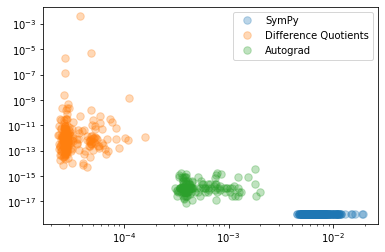

In [23]:
error_exp(200)

## Problem 2: Numerical integration exercises (5 points)

### Ex 2.1

In [24]:
gx = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1

In [25]:
def int_approx(gx, a, b, N, method='midpoint'):
    exact = 4373 + 1/3
    
    if method == 'midpoint':
        mid_approx = 0
        for i in range(N):
            xi = a + (2 * i + 1) * (b - a) / (2 * N)
            mid_approx += (b - a) * gx(xi) / N
        return mid_approx, abs(mid_approx - exact)
    
    if method == 'trapezoid':
        sum_gxi = 0
        for i in range(1, N):
            xi = a + i * (b - a) / N
            sum_gxi += (b - a) * gx(xi) / N
        tra_approx = (b - a) * (gx(a) + gx(b)) / (2 * N) + sum_gxi
        return tra_approx, abs(tra_approx - exact)
    
    if method == 'Simpsons':
        sum_gxi_odd = 0
        sum_gxi_even = 0
        for i in range(1, 2 * N):
            xi = a + i * (b - a) / (2 * N)
            if i % 2:
                sum_gxi_odd += 4 * (b - a) * gx(xi) / (6 * N)
            else:
                sum_gxi_even += 2 * (b - a) * gx(xi) / (6 * N)
        Sim_approx = (b - a) * (gx(a) + gx(b)) / (6 * N) + sum_gxi_odd + sum_gxi_even
        return Sim_approx, abs(Sim_approx - exact)
    

In [26]:
print("If N = 200, the values of these integrals are: ")
print("Midpoint:", int_approx(gx, -10, 10, 200)[0], sep='    ')
print("Trapezoid:", int_approx(gx, -10, 10, 200, method='trapezoid')[0], sep='   ')
print("Simpsons:", int_approx(gx, -10, 10, 200, method='Simpsons')[0], sep='    ')

If N = 200, the values of these integrals are: 
Midpoint:    4372.991172499995
Trapezoid:   4374.017659999996
Simpsons:    4373.333334999998


In [27]:
er_mid = np.arange(20, 201, 1, dtype='float')
er_tra = np.arange(20, 201, 1, dtype='float')
er_Sim = np.arange(20, 201, 1, dtype='float')
Nvec = np.arange(20, 201, 1)
for i in range(20, 201):
    er_mid[i - 20] = int_approx(gx, -10, 10, i)[1]
    er_tra[i - 20] = int_approx(gx, -10, 10, i, method='trapezoid')[1]
    er_Sim[i - 20] = int_approx(gx, -10, 10, i, method='Simpsons')[1]

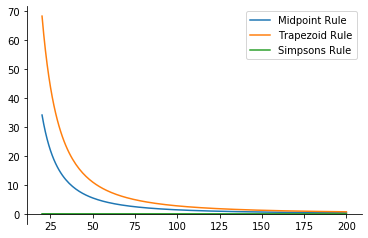

In [28]:
# Plot for midpoint, trapezoid, and Simpsons rule
ax = plt.gca()
ax.plot(Nvec, er_mid, label='Midpoint Rule')
ax.plot(Nvec, er_tra, label='Trapezoid Rule')
ax.plot(Nvec, er_Sim, label='Simpsons Rule')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

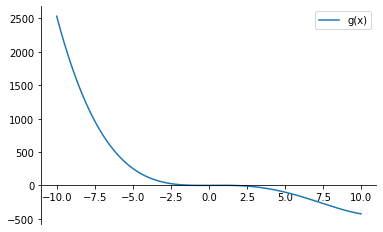

In [29]:
# Plot g(x)
x_range = np.linspace(-10, 10, 1000)
ax = plt.gca()
ax.plot(x_range, gx(x_range), label='g(x)')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

From the first three figures we could see that when N is between 20 and 200, Simpson rule converges the fastest, midpoint rule converges the second fastest, while trapezoid rule converges the most slowly. This is because $g(x)$ has a order of 4, so the graph is nonlinear in $x$. Since only Simpsons rule offers a smooth nonlinear approximation, it will definitely quickly converges to the true value. Trapezoid rule links the two endpoints of a bin with a line and adds up the area of the trapezoids, so it is affected by the convexity of $g(x)$. It can be seen that in the range $[-10, 10]$, $g(x)$ is concave in $[-10, 2]$ and convex in $(2, 10]$ (approximately). In addition, the absolute values of $g(x)$ is much larger in the concave part than in the convex part. Therefore, trapezoid rule will overestimate the integral, especially when the number of nodes are not large. Midpoint rule only adds up the area of the rectangles with widths equal to the length of bins and heights equal to the value of function at the midpoints, so it is not so largely affected by the convexity compared to trapezoid rule. As a result, midpoint rule will outperform trapezoid rule. 

### Ex 2.2

In [30]:
from scipy.stats import norm

In [31]:
def norm_approx(mu, sigma, N, k):
    Zs = []
    omegas = []
    approx = 0
    
    # generate nodes
    for i in range(N):
        Zs.append(mu - k * sigma + 2 * i * k * sigma / (N - 1))
        
    # calculate weights
    for i in range(N):    
        if i == 0:
            omegas.append(norm.cdf((Zs[0] + Zs[1]) / 2, mu, sigma))
        elif i == (N - 1):
            omegas.append(1 - norm.cdf((Zs[-2] + Zs[-1]) / 2, mu, sigma))
        else:
            Zmin = (Zs[i - 1] + Zs[i]) / 2
            Zmax = (Zs[i] + Zs[i + 1]) / 2
            omegas.append(norm.cdf(Zmax, mu, sigma) - norm.cdf(Zmin, mu, sigma))
            
    # calculate approximation
    for i in range(N):
        approx += Zs[i] * omegas[i]
        
    return Zs, omegas, approx

In [32]:
Zs, omegas, approx = norm_approx(5, 1.5, 11, 3)

In [33]:
print('index', 'nodes', 'weights', sep='     ')
for i in range(9):
    print("{}         {:.1f}       {:.4f}".format(i + 1, Zs[i], omegas[i]))
for i in range(9, 11):
    print("{}        {:.1f}       {:.4f}".format(i + 1, Zs[i], omegas[i]))

index     nodes     weights
1         0.5       0.0035
2         1.4       0.0144
3         2.3       0.0489
4         3.2       0.1173
5         4.1       0.1980
6         5.0       0.2358
7         5.9       0.1980
8         6.8       0.1173
9         7.7       0.0489
10        8.6       0.0144
11        9.5       0.0035


### Ex 2.3

In [34]:
def lognorm_approx(mu, sigma, N, k):
    Zs = []
    As = []
    omegas = []
    approx = 0
    
    # generate nodes
    for i in range(N):
        Zs.append(mu - k * sigma + 2 * i * k * sigma / (N - 1))
        As.append(np.exp(mu - k * sigma + 2 * i * k * sigma / (N - 1)))
    
    # calculate weights
    for i in range(N):    
        if i == 0:
            omegas.append(norm.cdf((Zs[0] + Zs[1]) / 2, mu, sigma))
        elif i == (N - 1):
            omegas.append(1 - norm.cdf((Zs[-2] + Zs[-1]) / 2, mu, sigma))
        else:
            Zmin = (Zs[i - 1] + Zs[i]) / 2
            Zmax = (Zs[i] + Zs[i + 1]) / 2
            omegas.append(norm.cdf(Zmax, mu, sigma) - norm.cdf(Zmin, mu, sigma))
    
    # calculate approximation
    for i in range(N):
        approx += As[i] * omegas[i]
    
    return As, omegas, approx

In [35]:
As, omegas, logapprox = lognorm_approx(5, 1.5, 11, 3)

In [36]:
print('index', end='    ')
print('nodes', 'weights', sep='       ')
for i in range(3):
    print("{}        {:.4f}      {:.4f}".format(i + 1, As[i], omegas[i]))
for i in range(3, 5):
    print("{}        {:.4f}     {:.4f}".format(i + 1, As[i], omegas[i]))
for i in range(5, 8):
    print("{}        {:.4f}    {:.4f}".format(i + 1, As[i], omegas[i]))
print("{}        {:.4f}   {:.4f}".format(9, As[8], omegas[8]))
print("{}       {:.4f}   {:.4f}".format(10, As[9], omegas[9]))
print("{}       {:.4f}  {:.4f}".format(11, As[10], omegas[10]))

index    nodes       weights
1        1.6487      0.0035
2        4.0552      0.0144
3        9.9742      0.0489
4        24.5325     0.1173
5        60.3403     0.1980
6        148.4132    0.2358
7        365.0375    0.1980
8        897.8473    0.1173
9        2208.3480   0.0489
10       5431.6596   0.0144
11       13359.7268  0.0035


From the above table we can find that the nodes are not equally spaced but the weights are the same as Ex 2.2

### Ex 2.4

In [37]:
exact = np.exp(10.5 + 0.8 ** 2 / 2)

In [38]:
print("The true expected value is {:.2f}".format(exact))

The true expected value is 50011.09


In [39]:
As, omegas, logapprox = lognorm_approx(10.5, 0.8, 11, 3)

In [40]:
print("The estimated expected value is {:.2f}".format(logapprox))

The estimated expected value is 50352.46


In [41]:
print("The difference between the true value and the expected value is {:.2f}".format(abs(exact - logapprox)))

The difference between the true value and the expected value is 341.37


### Ex 3.1

In [42]:
import scipy.optimize as opt

In [43]:
def gauss_approx_func(x):
    return [x[3] + x[4] + x[5] - 20, 
            x[3] * x[0] + x[4] * x[1] + x[5] * x[2],
            x[3] * x[0] ** 2 + x[4] * x[1] ** 2 + x[5] * x[2] ** 2 - 2000 / 3,
            x[3] * x[0] ** 3 + x[4] * x[1] ** 3 + x[5] * x[2] ** 3,
            x[3] * x[0] ** 4 + x[4] * x[1] ** 4 + x[5] * x[2] ** 4 - 40000,
            x[3] * x[0] ** 5 + x[4] * x[1] ** 5 + x[5] * x[2] ** 5]

In [44]:
x_sol = opt.root(gauss_approx_func, [1, 3, 5, 6, 7, 7])

In [45]:
x_sol.x

array([-7.74596669e+00, -4.90958642e-10,  7.74596669e+00,  5.55555556e+00,
        8.88888889e+00,  5.55555556e+00])

In [46]:
gauss_approx_val = x_sol.x[3] * gx(x_sol.x[0]) + x_sol.x[4] * gx(x_sol.x[1]) + x_sol.x[5] * gx(x_sol.x[2])

In [47]:
print("The Gaussian approximation is {}".format(gauss_approx_val))

The Gaussian approximation is 4373.33333323689


In [48]:
print("The difference between the true value and the Gaussian approximation is {}".format(abs(gauss_approx_val - 4373 - 1/3)))

The difference between the true value and the Gaussian approximation is 9.644312132239818e-08


Compared to Ex 2.1, the error is smaller than three types of Newton-Cotes approximations. Moreover, we only choose a small $N$ to get the Gaussian approximation. Therefore, we can say that Gaussian approximation does a better job in terms of reducing the error.

### Ex 3.2

In [49]:
from scipy.integrate import quad

In [50]:
print("The approximation by scipy.integrate.quad is {}".format(quad(gx, -10, 10)[0]))

The approximation by scipy.integrate.quad is 4373.333333333334


In [51]:
print("The difference between the true value and the esimated value is {}".format(abs(quad(gx, -10, 10)[0] -4373 - 1/3)))

The difference between the true value and the esimated value is 6.063483048990292e-13


Compared to all the approximations, the command `scipy.integrate.quad` gives the most precise approximation.

### Ex 4.1

In [52]:
import scipy.stats as sts

In [53]:
np.random.seed(seed=25)

In [54]:
N = 0
while True:
    N += 1
    xy_draws = 2 * sts.uniform.rvs(size=(N, 2)) - 1
    x_draws = xy_draws[:, 0]
    y_draws = xy_draws[:, 1]
    gx = (x_draws ** 2 + y_draws ** 2) <= 1
    if round(4 * gx.sum() / N, 4) == 3.1415: 
        break

print('The smallest N is {} and the corresponding estimation is {}'.format(N, 4 * gx.sum() / N))

The smallest N is 1053 and the corresponding estimation is 3.141500474833808


### Ex 4.2

In [55]:
def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [56]:
def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [57]:
primes_ascend(10)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29])

In [58]:
def ele_equi_seq(n, d, method='Weyl'):
 
    if method == 'Weyl':
        ele = n * primes_ascend(d) ** 0.5 - np.floor(n * primes_ascend(d) ** 0.5)
        return ele
    
    if method == 'Haber':
        ele = n * (n + 1) * primes_ascend(d) ** 0.5 / 2 - np.floor(n * (n + 1) * primes_ascend(d) ** 0.5 / 2)
        return ele
    
    if method == 'Niederreiter':
        ele = n * 2 ** (np.arange(1, d + 1) / (d + 1)) - np.floor(n * 2 ** (np.arange(1, d + 1) / (d + 1)))
        return ele
    
    if method == 'Baker':
        ele = n * np.exp(primes_ascend(d)) - np.floor(n * np.exp(primes_ascend(d)))
        return ele
     

To test the above function, I replicate the figure in Dr. Evans' notebook.

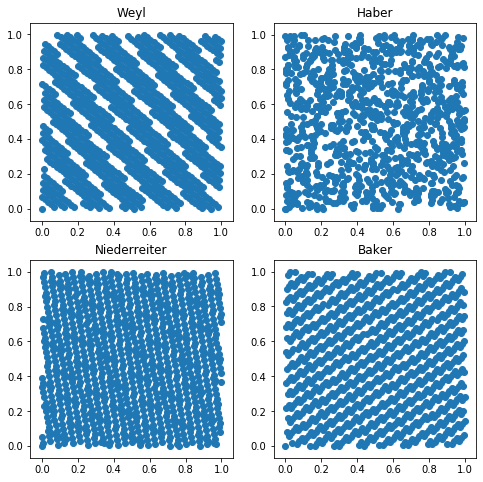

In [59]:
x_W = []
y_W = []
x_H = []
y_H = []
x_N = []
y_N = []
x_B = []
y_B = []

for i in range(1000):
    x_W.append(ele_equi_seq(i, 2)[0])
    y_W.append(ele_equi_seq(i, 2)[1])
    x_H.append(ele_equi_seq(i, 2, method='Haber')[0])
    y_H.append(ele_equi_seq(i, 2, method='Haber')[1])
    x_N.append(ele_equi_seq(i, 2, method='Niederreiter')[0])
    y_N.append(ele_equi_seq(i, 2, method='Niederreiter')[1])    
    x_B.append(ele_equi_seq(i, 2, method='Baker')[0])
    y_B.append(ele_equi_seq(i, 2, method='Baker')[1])
    
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax1.scatter(x_W, y_W)
ax1.set_title("Weyl")
ax2 = fig.add_subplot(222)
ax2.scatter(x_H, y_H)
ax2.set_title("Haber")
ax3 = fig.add_subplot(223)
ax3.scatter(x_N, y_N)
ax3.set_title("Niederreiter")
ax4 = fig.add_subplot(224)
ax4.scatter(x_B, y_B)
ax4.set_title("Baker")
plt.show()

### Ex 4.3

In [60]:
# Weyl sequences

N = 0
while True:
    N += 1
    x_draws = np.array([2 * ele_equi_seq(i, 2)[0] - 1 for i in range(N)])
    y_draws = np.array([2 * ele_equi_seq(i, 2)[1] - 1 for i in range(N)])
    gx = (x_draws ** 2 + y_draws ** 2) <= 1
    if round(4 * gx.sum() / N, 4) == 3.1415: 
        break

print('The smallest N is {} and the corresponding estimation is {}'.format(N, 4 * gx.sum() / N))

The smallest N is 1230 and the corresponding estimation is 3.1414634146341465


In [61]:
# Haber sequences

N = 0
while True:
    N += 1
    x_draws = np.array([2 * ele_equi_seq(i, 2, method='Haber')[0] - 1 for i in range(N)])
    y_draws = np.array([2 * ele_equi_seq(i, 2, method='Haber')[1] - 1 for i in range(N)])
    gx = (x_draws ** 2 + y_draws ** 2) <= 1
    if round(4 * gx.sum() / N, 4) == 3.1415: 
        break

print('The smallest N is {} and the corresponding estimation is {}'.format(N, 4 * gx.sum() / N))

The smallest N is 2064 and the corresponding estimation is 3.141472868217054


In [62]:
# Niederreiter sequences

N = 0
while True:
    N += 1
    x_draws = np.array([2 * ele_equi_seq(i, 2, method='Niederreiter')[0] - 1 for i in range(N)])
    y_draws = np.array([2 * ele_equi_seq(i, 2, method='Niederreiter')[1] - 1 for i in range(N)])
    gx = (x_draws ** 2 + y_draws ** 2) <= 1
    if round(4 * gx.sum() / N, 4) == 3.1415: 
        break

print('The smallest N is {} and the corresponding estimation is {}'.format(N, 4 * gx.sum() / N))

The smallest N is 1845 and the corresponding estimation is 3.1414634146341465


In [63]:
# Baker sequences

N = 0
while True:
    N += 1
    x_draws = np.array([2 * ele_equi_seq(i, 2, method='Baker')[0] - 1 for i in range(N)])
    y_draws = np.array([2 * ele_equi_seq(i, 2, method='Baker')[1] - 1 for i in range(N)])
    gx = (x_draws ** 2 + y_draws ** 2) <= 1
    if round(4 * gx.sum() / N, 4) == 3.1415: 
        break

print('The smallest N is {} and the corresponding estimation is {}'.format(N, 4 * gx.sum() / N))

The smallest N is 1272 and the corresponding estimation is 3.141509433962264


In terms of the rates of convergence, Weyl sequences do the best job, Baker sequences do the second best, Niederreiter sequences do the second worst, and Haber sequences do the worst.